<a href="https://colab.research.google.com/github/ChuLinh02/GraphMining/blob/main/HW03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSC17103 - Colab 3 - Các mô hình tạo sinh mạng lưới (Tiếp)**

Đây là Bài tập 03 trong môn học Khai thác Dữ liệu Đồ thị (Graph Mining) - CSC1703 tại Khoa Công nghệ Thông tin, Trường Đại học Khoa học Tự nhiên, Đại học Quốc gia TP.HCM

(Cập nhật lần cuối: 21/07/2024)

Họ tên: Chu Hải Linh

MSSV: 21120496

## **Cách thực hiện và nộp bài tập**

&#9889; Chú ý, bạn nên thực hiện theo sự hướng dẫn dưới đây. Nếu có bất kỳ điều gì không rõ, bạn cần liên hệ ngay trợ giảng/ giáo viên thực hành để được hỗ trợ kịp thời.

**Cách làm bài**

Bạn sẽ làm trực tiếp trên file notebook này. Đầu tiên, bạn điền họ tên và MSSV vào phần đầu file ở bên trên. Trong file, bạn làm bài ở những chỗ có ghi là:
```python
# YOUR CODE HERE
raise NotImplementedError()
```
hoặc đối với những phần code không bắt buộc thì là:
```python
# YOUR CODE HERE (OPTION)
```
hoặc đối với markdown cell thì là:
```markdown
YOUR ANSWER HERE
```

**Cách nộp bài**

Trước khi nộp bài, bạn chọn `Kernel` - `Restart Kernel & Run All Cells` đối với trường hợp sử dụng môi trường local hoặc `Runtime` - `Restart session and run all` đối với môi trường Google Colab, để đảm bảo mọi chuyện diễn ra đúng như mong đợi.

Sau đó, bạn tạo thư mục nộp bài theo cấu trúc sau:
- Thư mục `MSSV` (ví dụ, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`)
    - File `HW03.ipynb` (không cần nộp các file khác)

Cuối cùng, bạn nén thư mục `MSSV` này lại với định dạng nén là .zip (chứ không được là .rar hay các định dạng khác) và nộp ở link trên moodle. \
<font color=red>Bạn lưu ý tuân thủ chính xác qui định nộp bài này.</font>

## Setup và Import các thứ

In [1]:
# Upgrade packages
# !pip install --upgrade scipy networkx

In [2]:
# Import
import random
import numpy as np # For numerical computation
import networkx as nx # For network/ graph manipulation
import matplotlib.pyplot as plt # For visualization
import scipy.stats as st
from scipy.stats import ks_2samp
plt.style.use("fast")

from typing import Tuple, Dict

%matplotlib inline

In [3]:
# Make sure something
assert nx.__version__ > '2.5'

## Task 01: Độ dài đường đi trung bình trong mô hình Watts-Strogatz

Trong bài tập trước, chúng ta đã tìm hiểu mô hình Watts-Strogatz, một mô hình thế giới nhỏ — kết nối lại một cạnh có xác suất `p` trong mạng vòng với các `n` đỉnh và bậc `k`.

Bây giờ ta sẽ kiểm tra thử trung bình độ dài đường đi có xu hướng tiến đến giá trị như thế nào trong quá trình hình thành một mô hình thế giới nhỏ (small-world).

$$\langle L \rangle = \begin{cases}
N/2k, \quad\text{ nếu } p \to 0 \\
\log(N)/\log(k), \quad\text{ nếu } p \to 1
\end{cases}$$

Như công thức trên, ta có một giới hạn trên và giới hạn dưới của độ dài đường đi với $0 < p < 1$.

Nhiệm vụ của các bạn là hoàn thành hàm `smallworldPathLength` với các tham số của mô hình Watts-Strogatz `n, k, p` mà trả cề độ dài trung bình đường đi trong mỗi bước. Chiều dài của mảng là `n`.

*Gợi ý: tính toán trung bình đường đi ngắn nhất bằng cách sử dụng `nx.average_shortest_path_length`*

In [4]:
def ringLattice(n: int, k: int) -> nx.Graph:
    """Hàm tạo đồ thị vòng.

    Parameters
    ----------
    n
        (int) số lượng đỉnh cho trước
    k
        (int) bậc đỉnh

    Returns
    -------
        (nx.Graph) đồ thị kết quả
    """
    # YOUR CODE HERE
    # Create a ring lattice
    G = nx.Graph()
    G.add_nodes_from(range(n))

    # Connect each node to its k nearest neighbors in a circular manner
    for node in range(n):
      for neighbor_offset in range(1, k//2 + 1):  # Connect to k/2 neighbors each side
        # Add "right-side" neighbor
        right_neighbor = (node + neighbor_offset) % n
        G.add_edge(node, right_neighbor)

        # Add "left-side" neighbor
        left_neighbor = (node - neighbor_offset) % n
        G.add_edge(node, left_neighbor)

    return G

In [5]:
def rewire(G: nx.Graph, node: int, k: int, p: float) -> nx.Graph:
    """Hàm rewire để nối lại một cạnh (node, i) thành một cạnh (node, j) ngẫu nhiên với xác suất cho trước.

    Parameters
    ----------
    G
        (nx.Graph) đồ thị đầu vào
    node
        (int) input node
    k
        (int) bậc đỉnh
    p
        (float) xác suất nối lại

    Returns
    -------
        (nx.Graph) đồ thị kết quả
    """
    # YOUR CODE HERE
    # Total number of nodes in the graph
    n = G.number_of_nodes()

    # Iterate over the "right-side" neighbors
    for neighbor_offset in range(1, k // 2 + 1):
      # Calculate the original neighbor on the right side
      original_neighbor = (node + neighbor_offset) % n

      # Decide whether to rewire this edge
      r = random.random()
      if (r <= p):
        # Randomly select a new neighbor
        new_neighbor = random.choice(list(G.nodes))
        while new_neighbor == node or new_neighbor == original_neighbor or G.has_edge(node, new_neighbor):
          new_neighbor = random.choice(list(G.nodes))
        # Rewire: remove the original edge and add new edge
        G.remove_edge(node, original_neighbor)
        G.add_edge(node, new_neighbor)

    return G

In [6]:
def smallworldPathLength(n: int, k: int, p: float) -> np.ndarray:
    # YOUR CODE HERE
    G = ringLattice(n, k)
    avg_path_lengths = []
    for node in G.nodes:
        G = rewire(G, node, k, p)
        if nx.is_connected(G):
            avg_length = nx.average_shortest_path_length(G)
        else:
            avg_length = float('inf')

        avg_path_lengths.append(avg_length)

    return np.array(avg_path_lengths)


In [7]:
# Test 1
n, k, p = 50, 8, 0.1
n, k, p = 101, 10, 0.05
lengths = smallworldPathLength(n, k, p)
step_space = np.log(np.arange(1, len(lengths) + 1))
X = np.stack([step_space, np.ones(lengths.shape[0])], axis=1)
assert lengths.shape[0] == n
assert 0.1 < -(np.linalg.pinv(X) @ np.log(lengths))[0] < 0.25

In [8]:
# Test 2
n, k, p = 101, 10, 0.05
lengths = smallworldPathLength(n, k, p)
step_space = np.log(np.arange(1, len(lengths) + 1))
X = np.stack([step_space, np.ones(lengths.shape[0])], axis=1)
assert lengths.shape[0] == n
assert 0.1 < -(np.linalg.pinv(X) @ np.log(lengths))[0] < 0.25

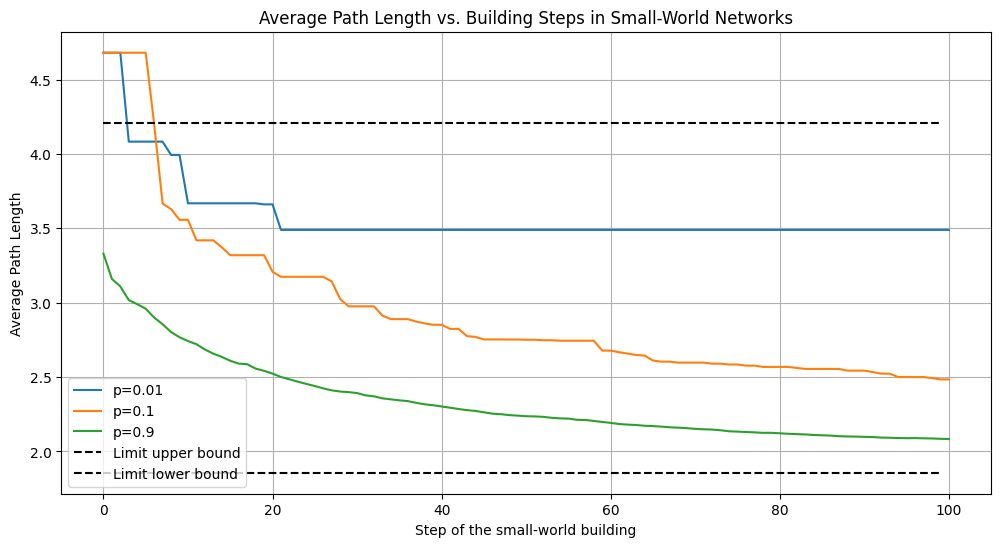

In [9]:
def plotSmallworldPathLengths():
    plt.figure(figsize=(12, 6))

    # Parameters for the small-world network
    params = [(0.01, 'p=0.01'), (0.1, 'p=0.1'), (0.9, 'p=0.9')]

    for p, label in params:
        n, k = 101, 12
        lengths = smallworldPathLength(n, k, p)
        plt.plot(lengths, label=label)

    # Plot the theoretical bounds
    n, k = 101, 12
    upper_bound = n / 2 / k
    lower_bound = np.log(n) / np.log(k)

    plt.plot([0, 99], [upper_bound, upper_bound],
             'k--', label='Limit upper bound')
    plt.plot([0, 99], [lower_bound, lower_bound],
             'k--', label='Limit lower bound')

    plt.xlabel('Step of the small-world building')
    plt.ylabel('Average Path Length')
    plt.title('Average Path Length vs. Building Steps in Small-World Networks')
    plt.grid(True)
    plt.legend(loc='lower left')

    plt.show()


plotSmallworldPathLengths()

Bạn có nhận xét gì?

YOUR ANSWER HERE

**1. Tác động của tham số p:**

- Khi **p = 0.01** (xanh dương): Đường đi trung bình giảm dần nhưng chậm, do xác suất liên kết lại rất thấp. Điều này cho thấy mạng vẫn giữ cấu trúc ban đầu khá mạnh, và việc hình thành các đường tắt (shortcuts) chưa phổ biến.
- Khi **p = 0.1** (màu cam): Độ dài đường đi trung bình giảm nhanh hơn so với p = 0.01, cho thấy việc tăng xác suất liên kết lại làm tăng tính thế giới nhỏ của mạng. Điều này phù hợp với lý thuyết rằng các đường tắt giúp kết nối các phần xa nhau trong mạng.
- Khi **p = 0.9** (màu xanh lá cây): Đường đi trung bình giảm rất nhanh và tiệm cận mức thấp hơn gần như ngay lập tức. Điều này cho thấy khi p rất cao, mạng trở nên ngẫu nhiên hóa, và tính thế giới nhỏ trở nên rõ ràng.

**2. Sự hội tụ:**

- Với cả ba giá trị của p, độ dài đường đi trung bình dần hội tụ về mức thấp hơn, nhưng tốc độ hội tụ khác nhau. p cao (0.9) hội tụ nhanh nhất, trong khi p thấp (0.01) hội tụ chậm nhất.

**3. Vai trò của các giới hạn (limit bounds):**

- Giới hạn trên: Cho thấy giá trị khởi đầu của độ dài đường đi trung bình trước khi có bất kỳ bước xây dựng nào. Điều này đại diện cho trạng thái ban đầu của mạng, khi không có các liên kết lại.
- Giới hạn dưới: Đại diện cho mức tối thiểu mà độ dài đường đi trung bình có thể đạt được, khi mạng hoàn toàn ngẫu nhiên hoặc cực kỳ thế giới .

**4. Ý nghĩa thực tế:**

- Biểu đồ minh họa rõ ràng sự chuyển đổi từ mạng lưới có cấu trúc (structured network) sang mạng ngẫu nhiên (random network) khi tăng p.
- Tác động của các đường tắt rất rõ rệt, làm giảm đáng kể độ dài đường đi trung bình, đặc biệt ở các giá trị p trung bình đến cao.

## Task 02: Phân phối bậc trong mô hình Barabási–Albert

Cũng trong bài tập trước, các bạn đã được giới thiệu qua mô hình sinh Barabási–Albert hay còn gọi là preferential attachment model. Mô hình này là quá trình quá triển mà trong đó mỗi đỉnh mới liên kết đến `m` đỉnh đang tồn tại. Bậc đỉnh càng cao, xác suất liên kết càng cao. Cuối cùng, số lượng đỉnh trong đồ thị là `n`. Đồ thị Barabási–Albert có phân phối bậc như sau:

$$P(k) = \frac{2m^2}{k^3}$$

Dễ thấy, đây là luật lũy thừa (Power law) vói $\alpha = 3$ và $k_{\min} = m$


Trong phần này, chúng ta sẽ kiểm tra phát biểu trên bằng thực nghiệm! Bằng cách phát sinh một tập các đồ thị Barabási–Albert và ước lượng các tham số của luật lũy thừa bằng Maximum likelihood estimation (MLE).

$$\alpha = 1 + n \left[\sum_i \log \frac{k_i}{k_{\min}} \right]^{-1}$$

trong đó $k_{\min}$ được lựa chọn bằng cách cực tiểu [khoảng cách Kolmogorov-Smirnov](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) giữa phân phối quan trắc (observed distributions) và phân phối lý thuyết (theoretical distributions).


Trước tiên, bạn hoàn thành một hàm `powerLawPDF` mà nhận các tham số của phân phối luật lũy thừa và trả về CDF.

In [10]:
def powerLawPDF(x: int, alpha: float = 3.5, x_min: int = 1):
    # YOUR CODE HERE
    if x_min < 1:
      raise  ValueError("x_min phải lớn hơn hoặc bằng 1")
    x = np.array(x)
    pdf = np.where(
        x >= x_min,
        1 - (x_min / x) ** (alpha - 1),
        0
    )

    return pdf

In [11]:
# Test
assert powerLawPDF(2, 2, 1) == 0.5
assert powerLawPDF(10, 2, 1) == 0.9

Tiếp theo, bạn hoàn thành hàm `mlePowerLawParams` mà nhận đầu vào là một dãy bậc và trả về một tuple: the best $\alpha$, the best $k_{\min}$ tương ứng với MLE.

_Gợi ý: sử dụng `scipy.stats.kstest` trong đó một CDF lý thuyết là một hàm `powerLawPDF` và `args=(alpha, k_min)`_

In [12]:
def mlePowerLawParams(degree_sequence: np.ndarray) -> Tuple[Dict, Dict]:
    # YOUR CODE HERE
    unique_degrees = np.unique(degree_sequence)
    best_params = {"alpha": None, "k_min": None}
    ks_results = {"ks_stat": float('inf'), "alpha": None, "k_min": None}
    for k in unique_degrees:
      data = degree_sequence[degree_sequence >= k]
      alpha_hat = 1 + len(data) / np.sum(np.log(data / k))
      ks_distance = st.kstest(np.sort(data), lambda x: powerLawPDF(x, alpha_hat, k))

      if ks_distance.statistic < ks_results["ks_stat"]:
        ks_results["ks_stat"] = ks_distance.statistic
        ks_results["alpha"] = alpha_hat
        ks_results["k_min"] = k
        best_params["alpha"] = alpha_hat
        best_params["k_min"] = k

    return ks_results["alpha"], ks_results["k_min"]


In [13]:
# Test
data = np.array([1, 2, 3])
alpha, k_min = mlePowerLawParams(data)

assert alpha > 0, f"Expected alpha to be greater than 0, but got {alpha}"
assert k_min > 0, f"Expected k_min to be greater than 0, but got {k_min}"

<ipython-input-12-4857b62d9a87>:8: RuntimeWarning: divide by zero encountered in scalar divide
  alpha_hat = 1 + len(data) / np.sum(np.log(data / k))


Và bây giờ, bạn hoàn thành hàm `estimatePowerLaw` mà giúp ta sinh ra các đồ thị Barabási–Albert với `n` đỉnh, từ `m_min` đến `m_max` liên kết và trả về một tuple các mảng np.arrays: $\alpha$ and $k_{\min}$ cho mỗi đồ thị.


In [14]:
def estimatePowerLaw(n: int, m_min: int, m_max: int) -> Tuple[np.ndarray, np.ndarray]:
    # YOUR CODE HERE
    alpha_values = []
    kmin_values = []
    for m in range(m_min, m_max + 1):
      G  = nx.barabasi_albert_graph(n, m)
      degree_sequence = np.array([d for n, d in G.degree()])
      alpha, kmin = mlePowerLawParams(degree_sequence)
      alpha_values.append(alpha)
      kmin_values.append(kmin)

    return np.array(alpha_values), np.array(kmin_values)

In [15]:
# Test
n, m_min, m_max = 500, 2, 20
alpha, k_min = estimatePowerLaw(n, m_min, m_max)
expected_length = m_max - m_min + 1
assert alpha.shape[0] == expected_length, f"Expected alpha length {expected_length}, but got {alpha.shape[0]}"
alpha_mean = alpha.mean()
assert 2 < alpha_mean < 4, f"Expected alpha mean to be between 2 and 4, but got {alpha_mean}"
assert k_min[0] < k_min[-1], f"Expected k_min[0] < k_min[-1], but got k_min[0] = {k_min[0]} and k_min[-1] = {k_min[-1]}"

<ipython-input-12-4857b62d9a87>:8: RuntimeWarning: divide by zero encountered in scalar divide
  alpha_hat = 1 + len(data) / np.sum(np.log(data / k))


<ipython-input-12-4857b62d9a87>:8: RuntimeWarning: divide by zero encountered in scalar divide
  alpha_hat = 1 + len(data) / np.sum(np.log(data / k))


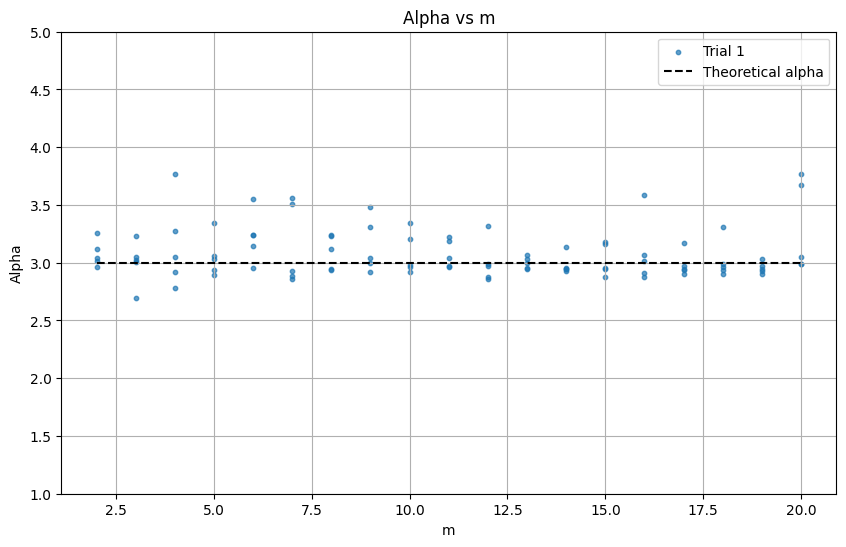

In [16]:
def plot_alpha_vs_m(n, m_min, m_max, num_trials=5):
    m_space = np.arange(m_min, m_max + 1)

    plt.figure(figsize=(10, 6))

    for trial in range(num_trials):
        alpha, k_min = estimatePowerLaw(n, m_min, m_max)
        plt.scatter(m_space, alpha, alpha=0.7, c='tab:blue', s=10, label=f'Trial {trial+1}' if trial == 0 else "")

    # Theoretical alpha line
    plt.plot([m_min, m_max], [3, 3], 'k--', label='Theoretical alpha')

    plt.ylim((1, 5))
    plt.xlabel('m')
    plt.ylabel('Alpha')
    plt.title('Alpha vs m')
    plt.grid(True)
    plt.legend()
    plt.show()

n, m_min, m_max = 500, 2, 20
plot_alpha_vs_m(n, m_min, m_max)

Bạn có nhận xét gì?

YOUR ANSWER HERE

**1. Sự ổn định của Alpha:**

- Các giá trị Alpha dao động xung quanh giá trị lý thuyết (Alpha = 3) nhưng không hoàn toàn cố định.
Khi 𝑚 tăng, mức độ dao động của Alpha giảm nhẹ, thể hiện sự hội tụ dần của mô hình về giá trị lý thuyết.

**2. Tính ngẫu nhiên giữa các thử nghiệm:**

- Có sự khác biệt nhỏ giữa các lần chạy thử nghiệm (Trial 1, Trial 2, ...). Điều này có thể do yếu tố ngẫu nhiên trong quá trình xây dựng mạng hoặc ước tính tham số.

**3. Khoảng dao động:**

- Với giá trị 𝑚 nhỏ (2-5), các giá trị Alpha dao động mạnh hơn, với một số giá trị vượt lên 4.5 hoặc giảm xuống dưới 2.5.
- Với giá trị 𝑚 lớn hơn (15-20), dao động của Alpha giảm dần và tập trung gần hơn với giá trị lý thuyết.

**4. Ý nghĩa của đường lý thuyết:**

- Đường đứt nét ở Alpha = 3 đóng vai trò là một tham chiếu. Các kết quả thực nghiệm dần hội tụ về đường này khi 𝑚 tăng, cho thấy tính đúng đắn của mô hình phân phối lũy thừa trong bối cảnh được khảo sát.


## Task 03: Hệ số gom cụm trong mô hình Barabási–Albert

Trong phần này, chúng ta sẽ đánh giá hệ số gom cụm trung bình trong mô hình Barabási–Albert. Bạn sẽ hoàn thành hàm `generateClusteringCoef` mà nhận đầu vào là mảng np.array là danh sách của `n` giá trị cho mỗi đồ thị và tham số `m`. Hàm này sinh ra các đồ thị Barabási–Albert và trả về mảng np.array của các hệ số gom cụm trung bình.


In [17]:
def generateClusteringCoef(n_list, m):
    # YOUR CODE HERE
    clustering_coefs = []
    for n in n_list:
      G = nx.barabasi_albert_graph(n, m)
      clustering_coef = nx.average_clustering(G)
      clustering_coefs.append(clustering_coef)
    return np.array(clustering_coefs)

In [18]:
# Test
n_list = np.arange(100, 3100, 100)
m = 6
coeffs = generateClusteringCoef(n_list, m)
assert coeffs.shape == (30,), f"Expected shape (30,), but got {coeffs.shape}"
X = np.log(n_list)
X = np.stack([np.ones_like(X), X], axis=1)
Y = np.log(coeffs)[:, None]
slope = (np.linalg.pinv(X) @ Y)[1][0]
assert -0.78 < slope < - \
    0.63, f"Expected slope to be between -0.78 and -0.63, but got {slope}"

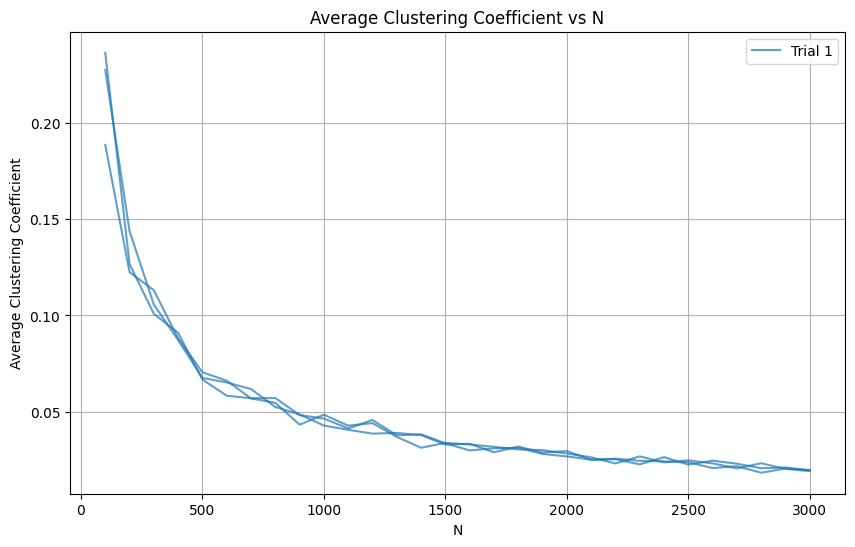

In [19]:
def plotClusteringCoefficients(n_list, m, num_trials=3):
    plt.figure(figsize=(10, 6))

    for trial in range(num_trials):
        coeffs = generateClusteringCoef(n_list, m)
        plt.plot(n_list, coeffs, c='tab:blue', alpha=0.7, label=f'Trial {trial+1}' if trial == 0 else "")

    plt.xlabel('N')
    plt.ylabel('Average Clustering Coefficient')
    plt.title('Average Clustering Coefficient vs N')
    plt.legend()
    plt.grid(True)
    plt.show()

n_list = np.arange(100, 3100, 100)
m = 6
plotClusteringCoefficients(n_list, m)

Bạn có nhận xét gì?

YOUR ANSWER HERE

**1. Xu hướng chính**

- Giảm dần: Hệ số gom cụm trung bình giảm dần khi số lượng đỉnh N tăng lên. Điều này phù hợp với lý thuyết của mô hình BA, trong đó khi mạng mở rộng, cấu trúc liên kết trở nên ít cụm hơn.
- Ở N nhỏ (100 - 500), hệ số gom cụm trung bình tương đối cao, khoảng từ 0.2 đến 0.05.
- Khi N tăng lên trên 1000, hệ số gom cụm giảm xuống dưới 0.05 và tiếp tục giảm đến khi ổn định xung quanh giá trị gần bằng 0.02 ở N lớn (từ 2000 trở đi).

**2. Đặc điểm và dao động**

- Có sự dao động nhẹ ở giá trị hệ số gom cụm khi N nhỏ (đặc biệt từ 100 đến 500). Điều này có thể do số lượng đỉnh nhỏ dẫn đến mạng chưa đủ lớn để thể hiện tính chất ổn định.
Khi N tăng lên, sự dao động giảm dần và đường cong trở nên mượt hơn.

**3. Ý nghĩa toán học và mô hình**

- Mô hình BA (Barabási–Albert) xây dựng mạng với cơ chế "kết nối ưu tiên" (preferential attachment), trong đó các đỉnh mới có xu hướng kết nối với các đỉnh có nhiều kết nối trước đó. Điều này làm giảm khả năng tạo thành các cụm nhỏ khi số lượng đỉnh tăng.
Hệ số gom cụm trung bình giảm cho thấy rằng mạng BA có xu hướng trở thành một mạng không có nhiều cụm khi mạng mở rộng, phù hợp với tính chất mạng không tỷ lệ (scale-free network).

**4. Hiệu suất và độ tin cậy**

- Số lần thử nghiệm (num_trials = 3) cho phép biểu đồ phản ánh mức độ ổn định của kết quả. Các đường vẽ từ 3 lần thử gần như trùng nhau, cho thấy rằng hàm `generateClusteringCoef` sinh ra kết quả nhất quán, đáng tin cậy.

## Task 04: Bậc động lực trong mô hình Barabási–Albert

Trong phần này, chúng ta sẽ đánh giá bậc động lực trong mô hình Barabási–Albert. Khái niệm này đánh giá về một trong các đỉnh khởi tạo và một trong các đỉnh được thêm vào mạng tại một thời điểm hiện tại của bước chuyển định (bước của thuật toán).

Bạn sẽ hoàn thành một hàm `generateDegreeDynamics` mà nhận đầu vào là một mảng np.array với các đỉnh được xem xét, hàm này sinh ra đồ thị Barabási–Albert ($n=3000$, $m=6$) và trả về một mảng np.array với kích thước `(29, len(nodes))` chỉ bậc của những đỉnh này tại thời điểm 100, 200, 300, ..., 2900. Nếu đỉnh chưa tồn tại, gán nó với giá trị `np.nan`.

_Gợi ý: sử dụng hàm `nx.barabasi_albert_graph`_


In [20]:
def generateDegreeDynamics(cons_nodes: np.ndarray) -> np.ndarray:
    # YOUR CODE HERE
    all_degrees = []
    for n in range(100, 3000, 100):
        g = nx.barabasi_albert_graph(n + 1, 6)
        degrees_of_cons_nodes = [
            g.degree[node] if node in g.nodes() else np.nan
            for node in cons_nodes
        ]
        all_degrees.append(degrees_of_cons_nodes)
    return np.array(all_degrees)

In [21]:
# Test
degree_dynamics = generateDegreeDynamics([0, 100, 700, 2000])
assert degree_dynamics.shape == (29, 4), f"Expected shape (29, 4), but got {degree_dynamics.shape}"
assert np.all(np.isnan(degree_dynamics[0]) == [False, False, True, True]), \
    f"Expected NaN mask [False, False, True, True] at row 0, but got {np.isnan(degree_dynamics[0])}"
assert np.all(np.isnan(degree_dynamics[9]) == [False, False, False, True]), \
    f"Expected NaN mask [False, False, False, True] at row 9, but got {np.isnan(degree_dynamics[9])}"
assert degree_dynamics[0, 0] < degree_dynamics[-1, 0], \
    f"Expected degree_dynamics[0, 0] < degree_dynamics[-1, 0], but got {degree_dynamics[0, 0]} >= {degree_dynamics[-1, 0]}"
assert degree_dynamics[0, 1] < degree_dynamics[-1, 1], \
    f"Expected degree_dynamics[0, 1] < degree_dynamics[-1, 1], but got {degree_dynamics[0, 1]} >= {degree_dynamics[-1, 1]}"
assert degree_dynamics[-1, 0] > degree_dynamics[-1, 3], \
    f"Expected degree_dynamics[-1, 0] > degree_dynamics[-1, 3], but got {degree_dynamics[-1, 0]} <= {degree_dynamics[-1, 3]}"

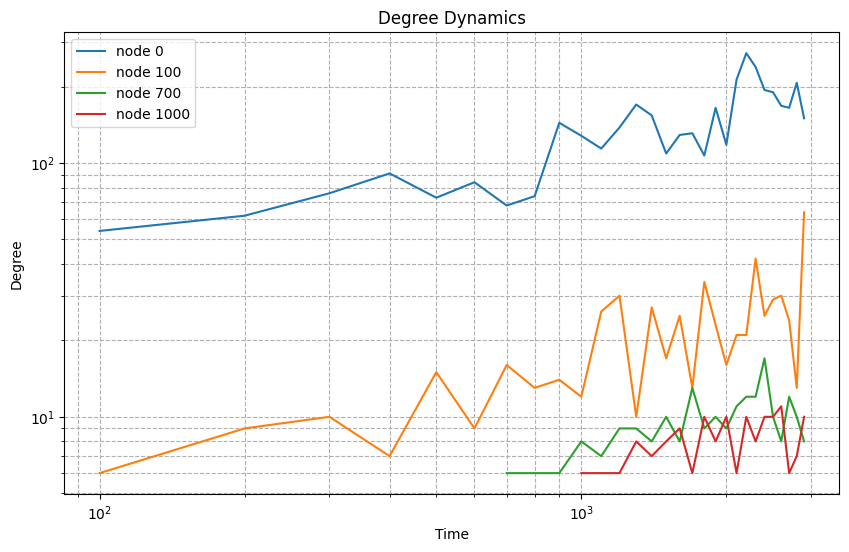

In [22]:
def plotDegreeDynamics():
    timesteps = [0, 100, 700, 1000]
    degree_dynamics = generateDegreeDynamics(timesteps)

    plt.figure(figsize=(10, 6))

    time_space = np.tile(np.arange(100, 3000, 100), (len(timesteps), 1)).T

    for i in range(len(timesteps)):
        plt.plot(time_space[:, i], degree_dynamics[:, i],
                 label=f'node {timesteps[i]}')

    plt.legend()
    plt.title('Degree Dynamics')
    plt.xlabel('Time')
    plt.ylabel('Degree')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which="both", ls="--")

    plt.show()


plotDegreeDynamics()

Bạn có nhận xét gì?

YOUR ANSWER HERE

**1. Xu hướng chung**

- **Tăng trưởng không đồng đều:** Bậc của các đỉnh tăng lên theo thời gian nhưng với tốc độ khác nhau, tùy thuộc vào thời điểm các đỉnh được thêm vào mạng.
- Đỉnh được thêm vào sớm hơn (ví dụ: node 0 và node 100) có bậc cao hơn đáng kể so với các đỉnh được thêm vào muộn hơn (node 700 và node 1000).

**2. Phân tích từng đỉnh**

- **Node 0 (Đỉnh khởi tạo):**
  - Có bậc cao nhất trong tất cả các thời điểm.
  - Đường cong tăng trưởng tương đối mượt mà và ổn định, phù hợp với cơ chế kết nối ưu tiên trong mô hình BA (đỉnh sớm thường có nhiều liên kết hơn).
  - Đến thời điểm cuối cùng, bậc của node 0 đạt khoảng trên 100.

- **Node 100:**
  - Cũng có xu hướng tăng trưởng bậc nhanh, nhưng thấp hơn đáng kể so với node 0.
  - Có một vài dao động nhẹ khi tăng trưởng bậc, nhưng nhìn chung vẫn giữ xu hướng tăng.

- **Node 700 và Node 1000:**
  - Hai node này được thêm vào muộn hơn trong quá trình hình thành mạng, nên có bậc thấp hơn nhiều.
  - Node 700 có bậc trung bình cao hơn node 1000, do xuất hiện sớm hơn.
  - Cả hai node này có sự dao động mạnh hơn, phản ánh sự cạnh tranh trong việc thu thập liên kết khi mạng mở rộng.

**3. Đặc điểm log-log**
- **Trục x (thời gian)** và **trục y (bậc)** đều được biểu diễn trên thang logarit. Điều này cho thấy rằng:
  - **Tăng trưởng bậc** của đỉnh khởi tạo và các đỉnh khác có thể được mô hình hóa theo quy luật lũy thừa (power-law growth).
  - Đường thẳng trên thang log-log cho thấy xu hướng của các đỉnh khởi tạo tăng trưởng theo hàm mũ, trong khi các đỉnh muộn hơn tăng trưởng chậm hơn hoặc không ổn định.

**4. Ý nghĩa toán học và mô hình**
- **Mô hình Barabási–Albert (BA)** xây dựng mạng với cơ chế ưu tiên các đỉnh đã có nhiều kết nối, dẫn đến hiệu ứng "người giàu càng giàu". Điều này giải thích tại sao node 0 có bậc cao hơn đáng kể so với các node muộn hơn.
- Các đỉnh được thêm vào muộn hơn phải **cạnh tranh** nhiều hơn để thu thập liên kết, dẫn đến bậc thấp và sự không ổn định.